# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hero\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
print(api_key)

e7d7bfbc5aba4de4b813cb787e7727b6


In [7]:
# Fetch the Bitcoin news articles
#bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")

bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy")

bitcoin_news


{'status': 'ok',
 'totalResults': 8327,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language='en')

ethereum_news

{'status': 'ok',
 'totalResults': 3760,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df

,text,date,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895
2,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917
3,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871
4,"In a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000
5,Netflix\r\n is making a docuseries about one o...,2022-02-11,-0.7096,0.000,0.169,0.831
6,"Bitcoin, the largest digital asset, extended i...",2022-01-22,0.3612,0.068,0.000,0.932
7,Block founder Jack Dorsey has announced on Twi...,2022-01-14,-0.4404,0.000,0.083,0.917
8,Tesla Inc (TSLA.O) will accept the meme-based ...,2022-01-14,0.3818,0.073,0.000,0.927
9,"On some level, the new mayor is simply employi...",2022-01-20,0.1779,0.052,0.000,0.948


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(bitcoin_sentiments)

ethereum_df

,text,date,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895
2,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917
3,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871
4,"In a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000
5,Netflix\r\n is making a docuseries about one o...,2022-02-11,-0.7096,0.000,0.169,0.831
6,"Bitcoin, the largest digital asset, extended i...",2022-01-22,0.3612,0.068,0.000,0.932
7,Block founder Jack Dorsey has announced on Twi...,2022-01-14,-0.4404,0.000,0.083,0.917
8,Tesla Inc (TSLA.O) will accept the meme-based ...,2022-01-14,0.3818,0.073,0.000,0.927
9,"On some level, the new mayor is simply employi...",2022-01-20,0.1779,0.052,0.000,0.948


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.043300,0.061950,0.044700,0.893350
std,0.458509,0.060617,0.053913,0.056841
min,-0.709600,0.000000,0.000000,0.765000
25%,-0.426225,0.000000,0.000000,0.862500
50%,0.127550,0.054500,0.000000,0.910500
75%,0.366350,0.109750,0.088000,0.928250
max,0.778300,0.185000,0.169000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,40.000000,40.000000,40.000000,40.000000
mean,0.069202,0.057600,0.033400,0.909000
std,0.382573,0.057017,0.050598,0.067486
min,-0.709600,0.000000,0.000000,0.765000
25%,-0.127600,0.000000,0.000000,0.874750
50%,0.038600,0.048500,0.000000,0.912000
75%,0.366350,0.105250,0.083000,0.956000
max,0.778300,0.185000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:Ethereum had a slightly higher mean score with 0.0617 to bitcoin's 0.0605

Q: Which coin had the highest compound score?

A: Bitcoin had the higher compund score of 0.380 in comparison to ethereum's 0.363

Q. Which coin had the highest positive score?

A: Both have equal score of 0.217

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hero\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'is', 'on', 'they', 'said', 'the', 'an', 'they'}

In [16]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in output if word not in sw.union(sw_addon)]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
#Define function
bitcoin_tokens = []

for text in bitcoin_df:
    # tokenize words in the article
    words = []
    words = words + tokenizer(text)
    # append all words for each article to the word_tokenized list
    bitcoin_tokens.append(words)
print(bitcoin_tokens)

[['text'], ['date'], ['compound'], ['positive'], ['negative'], ['neutral']]


In [18]:
#ethereum_df['tokens'] = ethereum_df['text'].apply(word_tokenize)
#ethereum_df.head()

bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df['text']]
bitcoin_df['tokens'] = bitcoin_tokens
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,"In a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000,"[new, blog, post, company, eth, bitcoin, taken..."


In [19]:
# Create a new tokens column for Ethereum
ethereum_token = []

for text in ethereum_df:
    # tokenize words in the article
    words = []
    words = words + tokenizer(text)
    # append all words for each article to the word_tokenized list
    ethereum_df.append(words)

In [20]:
#ethereum_df['tokens'] = ethereum_df['text'].apply(word_tokenize)
#ethereum_df.head()

ethereum_token = [tokenizer(headline) for headline in ethereum_df['text']]
ethereum_df['tokens'] = ethereum_token
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,"In a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000,"[new, blog, post, company, eth, bitcoin, taken..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
#Creating bitcoin tokenzied list from a list
bitcoin_tlist = [item for elem in bitcoin_tokens for item in elem]
print(bitcoin_tlist)

['even', 'arent', 'paying', 'attention', 'bitcoin', 'cryptocurrencies', 'might', 'noticed', 'value', 'plummeted', 'last', 'week', 'total', 'value', 'market', 'tumbling', 'high', 'tr', 'char', 'el', 'salvador', 'introduced', 'bitcoin', 'legal', 'tender', 'alongside', 'us', 'dollar', 'illustration', 'alex', 'castro', 'verge', 'international', 'monetary', 'funds', 'executive', 'board', 'ha', 'recommended', 'el', 'char', 'officially', 'building', 'open', 'bitcoin', 'mining', 'systemphoto', 'joe', 'raedlegetty', 'imagesblock', 'payment', 'company', 'formerly', 'known', 'square', 'working', 'building', 'open', 'bitcoin', 'mining', 'system', 'char', 'israeli', 'national', 'tal', 'prihar', 'pled', 'guilty', 'routing', 'money', 'kickback', 'bitcoin', 'shell', 'company', 'illustration', 'alex', 'castro', 'vergein', 'culmination', 'twoyear', 'legal', 'process', 'char', 'new', 'blog', 'post', 'company', 'eth', 'bitcoin', 'takenillustration', 'alex', 'castro', 'vergein', 'blog', 'post', 'published'

In [23]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = Counter(ngrams(bitcoin_tlist, n=2))
print(dict(btc_ngrams))

{('even', 'arent'): 1, ('arent', 'paying'): 1, ('paying', 'attention'): 1, ('attention', 'bitcoin'): 1, ('bitcoin', 'cryptocurrencies'): 1, ('cryptocurrencies', 'might'): 1, ('might', 'noticed'): 1, ('noticed', 'value'): 1, ('value', 'plummeted'): 1, ('plummeted', 'last'): 1, ('last', 'week'): 1, ('week', 'total'): 1, ('total', 'value'): 1, ('value', 'market'): 1, ('market', 'tumbling'): 1, ('tumbling', 'high'): 1, ('high', 'tr'): 1, ('tr', 'char'): 1, ('char', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'introduced'): 1, ('introduced', 'bitcoin'): 1, ('bitcoin', 'legal'): 1, ('legal', 'tender'): 1, ('tender', 'alongside'): 1, ('alongside', 'us'): 2, ('us', 'dollar'): 1, ('dollar', 'illustration'): 1, ('illustration', 'alex'): 2, ('alex', 'castro'): 3, ('castro', 'verge'): 1, ('verge', 'international'): 1, ('international', 'monetary'): 2, ('monetary', 'funds'): 1, ('funds', 'executive'): 1, ('executive', 'board'): 1, ('board', 'ha'): 1, ('ha', 'recommended'): 1, ('recommended', 'el'

In [24]:
#Creating ethereum tokenzied list from a list
ethereum_tlist = [item for elem in ethereum_token for item in elem]
print(ethereum_tlist)

['even', 'arent', 'paying', 'attention', 'bitcoin', 'cryptocurrencies', 'might', 'noticed', 'value', 'plummeted', 'last', 'week', 'total', 'value', 'market', 'tumbling', 'high', 'tr', 'char', 'el', 'salvador', 'introduced', 'bitcoin', 'legal', 'tender', 'alongside', 'us', 'dollar', 'illustration', 'alex', 'castro', 'verge', 'international', 'monetary', 'funds', 'executive', 'board', 'ha', 'recommended', 'el', 'char', 'officially', 'building', 'open', 'bitcoin', 'mining', 'systemphoto', 'joe', 'raedlegetty', 'imagesblock', 'payment', 'company', 'formerly', 'known', 'square', 'working', 'building', 'open', 'bitcoin', 'mining', 'system', 'char', 'israeli', 'national', 'tal', 'prihar', 'pled', 'guilty', 'routing', 'money', 'kickback', 'bitcoin', 'shell', 'company', 'illustration', 'alex', 'castro', 'vergein', 'culmination', 'twoyear', 'legal', 'process', 'char', 'new', 'blog', 'post', 'company', 'eth', 'bitcoin', 'takenillustration', 'alex', 'castro', 'vergein', 'blog', 'post', 'published'

In [25]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = Counter(ngrams(ethereum_tlist, n=2))
print(dict(eth_ngrams))

{('even', 'arent'): 1, ('arent', 'paying'): 1, ('paying', 'attention'): 1, ('attention', 'bitcoin'): 1, ('bitcoin', 'cryptocurrencies'): 1, ('cryptocurrencies', 'might'): 1, ('might', 'noticed'): 1, ('noticed', 'value'): 1, ('value', 'plummeted'): 1, ('plummeted', 'last'): 1, ('last', 'week'): 1, ('week', 'total'): 1, ('total', 'value'): 1, ('value', 'market'): 1, ('market', 'tumbling'): 1, ('tumbling', 'high'): 1, ('high', 'tr'): 1, ('tr', 'char'): 1, ('char', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'introduced'): 1, ('introduced', 'bitcoin'): 1, ('bitcoin', 'legal'): 1, ('legal', 'tender'): 1, ('tender', 'alongside'): 1, ('alongside', 'us'): 2, ('us', 'dollar'): 1, ('dollar', 'illustration'): 1, ('illustration', 'alex'): 2, ('alex', 'castro'): 4, ('castro', 'verge'): 1, ('verge', 'international'): 1, ('international', 'monetary'): 2, ('monetary', 'funds'): 1, ('funds', 'executive'): 1, ('executive', 'board'): 1, ('board', 'ha'): 1, ('ha', 'recommended'): 1, ('recommended', 'el'

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tlist, 10)

[('char', 20),
 ('bitcoin', 16),
 ('ha', 6),
 ('company', 6),
 ('open', 5),
 ('mining', 5),
 ('el', 4),
 ('building', 4),
 ('new', 4),
 ('last', 3)]

In [28]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_tlist, 10)

[('char', 39),
 ('bitcoin', 19),
 ('company', 11),
 ('new', 10),
 ('cryptocurrency', 10),
 ('ha', 9),
 ('open', 8),
 ('ethereum', 8),
 ('building', 7),
 ('digital', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
btc_string = ''.join([str(elem) for elem in bitcoin_tlist])
print(btc_string)

evenarentpayingattentionbitcoincryptocurrenciesmightnoticedvalueplummetedlastweektotalvaluemarkettumblinghightrcharelsalvadorintroducedbitcoinlegaltenderalongsideusdollarillustrationalexcastrovergeinternationalmonetaryfundsexecutiveboardharecommendedelcharofficiallybuildingopenbitcoinminingsystemphotojoeraedlegettyimagesblockpaymentcompanyformerlyknownsquareworkingbuildingopenbitcoinminingsystemcharisraelinationaltalpriharpledguiltyroutingmoneykickbackbitcoinshellcompanyillustrationalexcastrovergeinculminationtwoyearlegalprocesscharnewblogpostcompanyethbitcointakenillustrationalexcastrovergeinblogpostpublishedearlyhourthursdaymorningcryptocurrencycharnetflixmakingdocuseriesoneworstrappertimecoincidentallyheatherrazzlekhanmorganhusbandilyalichtensteinchargedweekconspiringcharbitcoinlargestdigitalassetextendeddeclinesaturdayhashedrecordhighnovemberbitcoinsdeclinesincehittingrecordhawipedcharblockfounderjackdorseyhaannouncedtwittercompanyofficiallybuildingopenbitcoinminingsystemdorseyfirs

Was facing the below error which is why the above code was searched & used.

# Generate the Bitcoin word cloud
wc = WordCloud().generate(''.join(bitcoin_tokens))
#plt.title("Bitcoin Word Cloud")
plt.imshow(wc)


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_29704/2510160137.py in <module>
      1 # Generate the Bitcoin word cloud
----> 2 wc = WordCloud().generate(''.join(bitcoin_tokens))
      3 #plt.title("Bitcoin Word Cloud")
      4 plt.imshow(wc)

TypeError: sequence item 0: expected str instance, list found

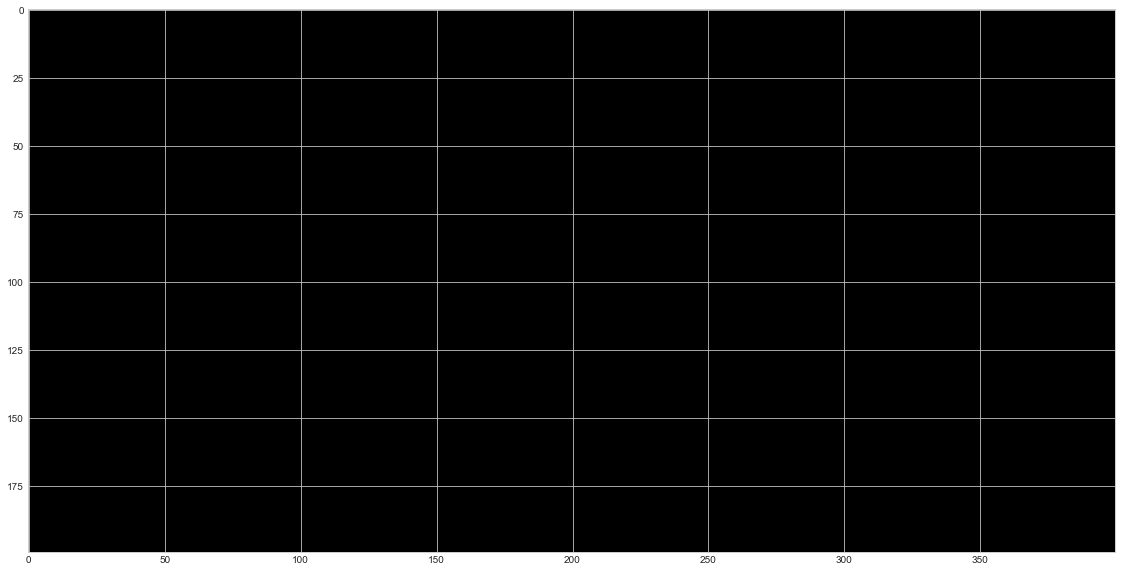

In [31]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

In [32]:
eth_string = ''.join([str(elem) for elem in ethereum_tlist])
print(eth_string)

evenarentpayingattentionbitcoincryptocurrenciesmightnoticedvalueplummetedlastweektotalvaluemarkettumblinghightrcharelsalvadorintroducedbitcoinlegaltenderalongsideusdollarillustrationalexcastrovergeinternationalmonetaryfundsexecutiveboardharecommendedelcharofficiallybuildingopenbitcoinminingsystemphotojoeraedlegettyimagesblockpaymentcompanyformerlyknownsquareworkingbuildingopenbitcoinminingsystemcharisraelinationaltalpriharpledguiltyroutingmoneykickbackbitcoinshellcompanyillustrationalexcastrovergeinculminationtwoyearlegalprocesscharnewblogpostcompanyethbitcointakenillustrationalexcastrovergeinblogpostpublishedearlyhourthursdaymorningcryptocurrencycharnetflixmakingdocuseriesoneworstrappertimecoincidentallyheatherrazzlekhanmorganhusbandilyalichtensteinchargedweekconspiringcharbitcoinlargestdigitalassetextendeddeclinesaturdayhashedrecordhighnovemberbitcoinsdeclinesincehittingrecordhawipedcharblockfounderjackdorseyhaannouncedtwittercompanyofficiallybuildingopenbitcoinminingsystemdorseyfirs

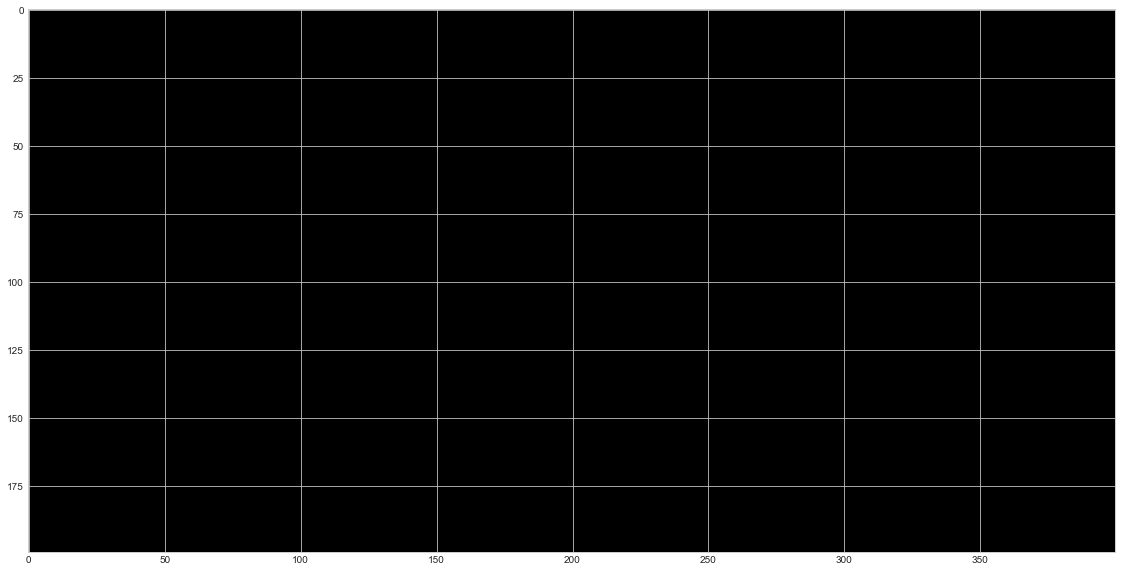

In [33]:
# Generate the Ethereum word cloud
wc_e = WordCloud().generate(eth_string)
plt.imshow(wc_e)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)

btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge

 

 The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system
Photo by Joe Raedle/Getty Images
Block, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies 
Illustration by Alex Castro / The Verge
In the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken
Illustration by Alex Castro / The Verge
In a blog post published in

In [38]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(btc_text_string)

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NERs"

In [39]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [40]:
# List all Entities
for ent in bitcoin_doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

last week DATE
3 MONEY
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)

eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge

 

 The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system
Photo by Joe Raedle/Getty Images
Block, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies 
Illustration by Alex Castro / The Verge
In the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken
Illustration by Alex Castro / The Verge
In a blog post published in

In [46]:
# Run the NER processor on all of the text
ethereum_doc = nlp(eth_text_string)

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NERs"

In [47]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [48]:
# List all Entities
for ent in ethereum_doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

last week DATE
3 MONEY
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 

---